### `Import Libraries`

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
np.random.seed(421)
tf.random.set_seed(421)

## `Load Dataset`

In [2]:
# get data
tf.random.set_seed(555)
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## `Normalizing`

In [3]:
# Normalizing
X_train_full = (X_train_full/255.0).astype('float32')
y_train_full = y_train_full.astype('int32')

X_test = (X_test/255.0).astype('float32')
y_test = y_test.astype('int32')

In [4]:
X_train_full.max(), X_train_full.min(), \
X_test.max(), X_test.min()

(1.0, 0.0, 1.0, 0.0)

## `Split Dataset`

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.1, shuffle=True, stratify=y_train_full)

print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)
print('----'*10)
print('X_val shape =>', X_valid.shape)
print('y_val shape =>', y_valid.shape)
print('----'*10)
print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape => (54000, 28, 28)
y_train shape => (54000,)
----------------------------------------
X_val shape => (6000, 28, 28)
y_val shape => (6000,)
----------------------------------------
X_test shape => (10000, 28, 28)
y_test shape => (10000,)


Text(0.5, 1.0, 'Label is 0')

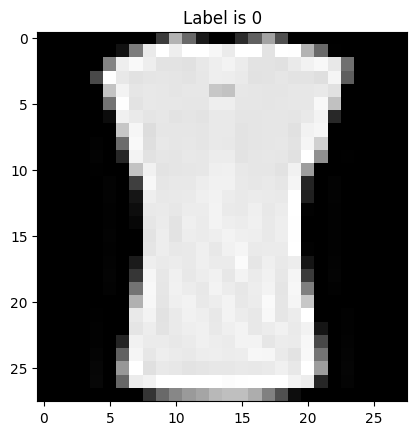

In [6]:
plt.imshow(X_train[50], cmap='gray')
plt.title(f'Label is {y_train[50]}')

In [7]:
target_only_plot = pd.DataFrame(y_train, columns=['target'])

img_indicies = {}   # label: index
for i in range(len(np.unique(y_train))):
    img_indicies[i] = target_only_plot[target_only_plot['target']==i].index[0]
img_indicies

{0: 7, 1: 33, 2: 2, 3: 0, 4: 15, 5: 25, 6: 1, 7: 5, 8: 22, 9: 18}

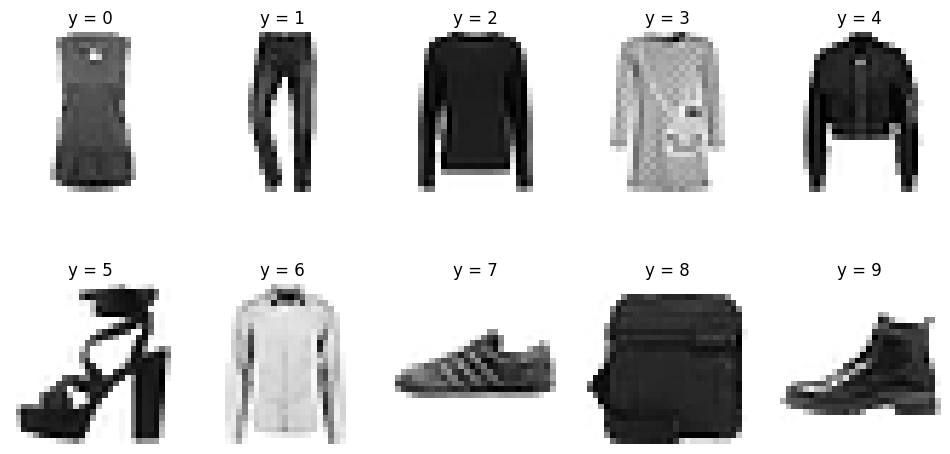

In [8]:
keys = list(img_indicies.keys())

# Plotting
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

label = 0
for row in range(2):
  for col in range(5):
    plt.sca(ax[row, col])
    plt.imshow(X_train[img_indicies[label]], cmap='binary')
    plt.title(f'y = {keys[label]}', fontsize=12, c='k')
    plt.axis('off')
    label += 1

In [9]:
# you can now know for each target value belong to what class
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot']

class_names[y_train[0]]

'Dress'

----

### `Model`

In [10]:
# model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>]

In [12]:
w, b = model.layers[1].get_weights()

In [13]:
w.shape, b.shape

((784, 128), (128,))

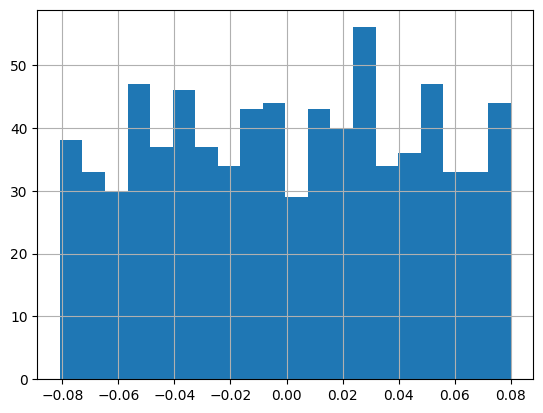

In [14]:
pd.DataFrame(w).iloc[:, 5].hist(bins=20);

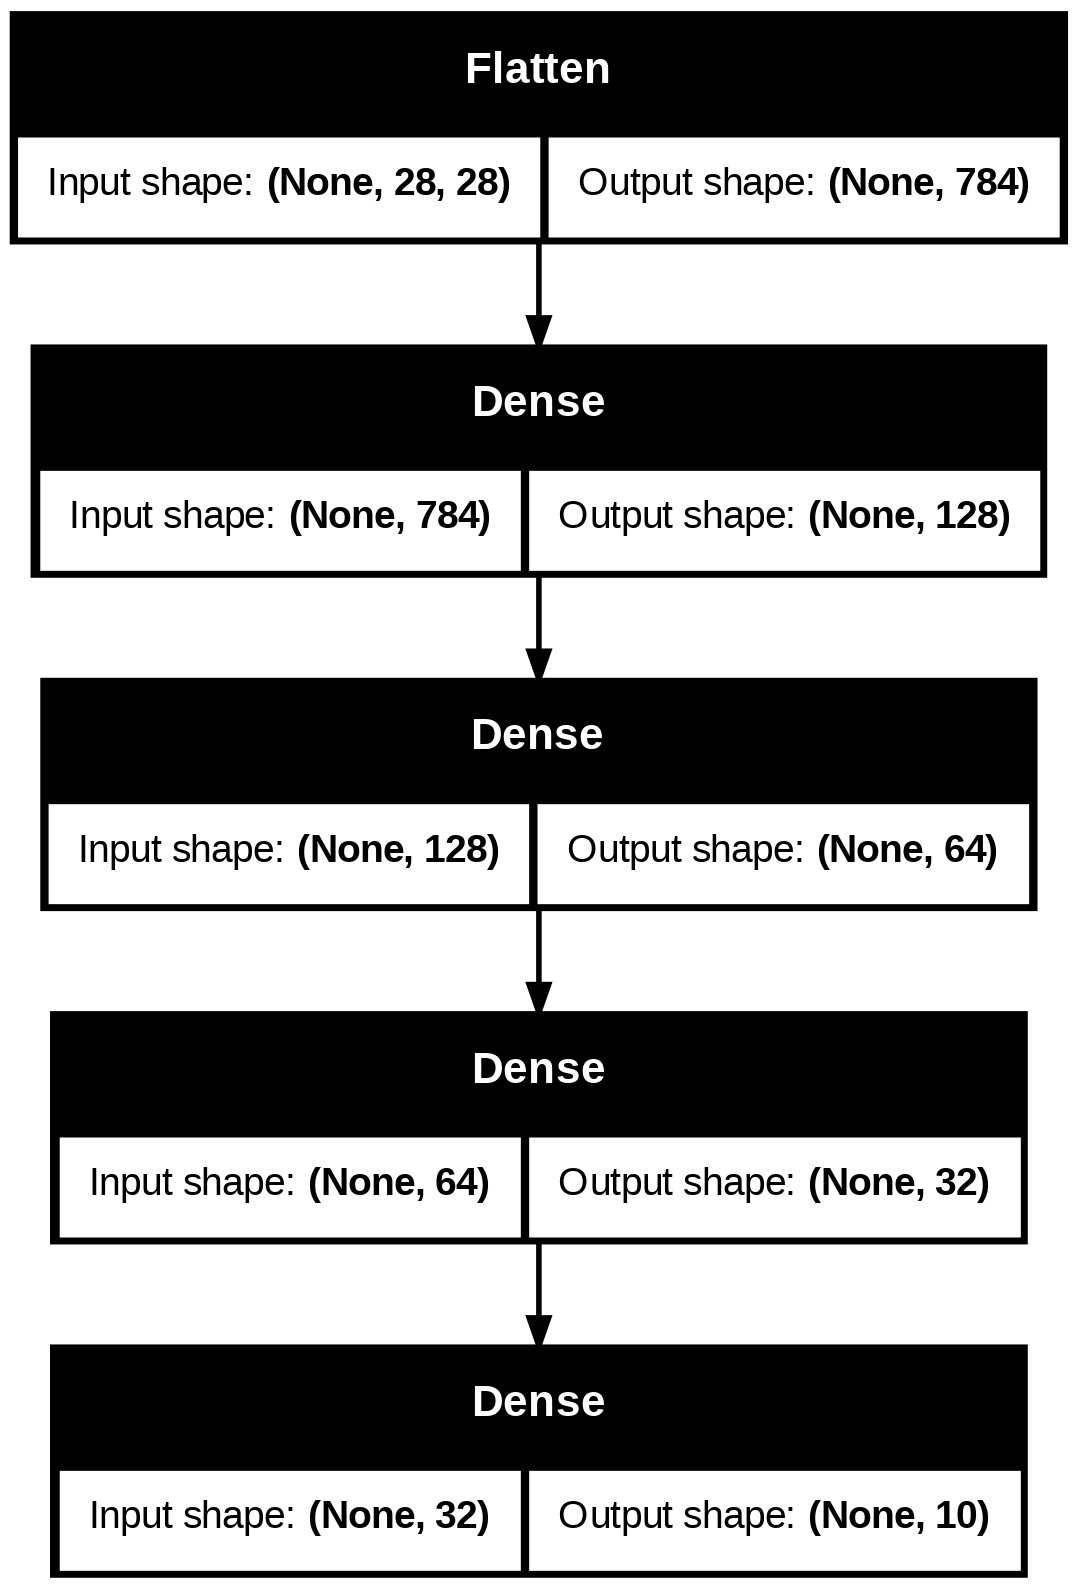

In [15]:
# plot model
tf.keras.utils.plot_model(model, show_shapes=True)

In [18]:
# early stopping
early_stopp = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=7, restore_best_weights=True)

# compile
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=['accuracy']
)

# Training
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid),
                    epochs=20,
                    batch_size=32,
                    callbacks=[early_stopp])

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6027 - loss: 1.1800 - val_accuracy: 0.8062 - val_loss: 0.5755
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8141 - loss: 0.5328 - val_accuracy: 0.8283 - val_loss: 0.4930
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8362 - loss: 0.4631 - val_accuracy: 0.8442 - val_loss: 0.4563
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8480 - loss: 0.4250 - val_accuracy: 0.8502 - val_loss: 0.4307
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8573 - loss: 0.3992 - val_accuracy: 0.8543 - val_loss: 0.4165
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8653 - loss: 0.3798 - val_accuracy: 0.8595 - val_loss: 0.4033
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8702 - loss: 0.3644 - val_accuracy: 0.8642 - val_loss: 0.3919
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8739 - loss: 0.3512 - 

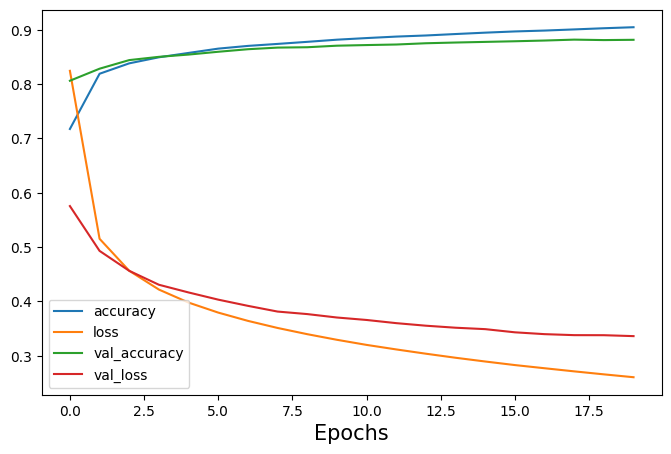

In [19]:
# Plotting History Results
history_info = history.history
pd.DataFrame(history_info).plot(figsize=(8, 5))
plt.xlabel('Epochs', fontsize=15)
plt.legend(loc='lower left')
plt.show()

---

In [21]:
# dump model
model.save("model.keras")

### `Inference`

In [20]:
# dump some test images
import os
from PIL import Image

for i, img_array in enumerate(X_test[:3]):
  img_array = (img_array * 255).astype(np.uint8)
  img = Image.fromarray(img_array)
  output_path = os.path.join(".", f'test_image_{i}.png')
  img.save(output_path)